In [28]:
!pip install flair

from flair.models import TextClassifier
from flair.data import Sentence
import pandas as pd
import tqdm
import re
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
from flair.datasets import TREC_6
from flair.embeddings import TransformerDocumentEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from flair.data import Sentence
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 7.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 77.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 78.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━

In [30]:
classifier = TextClassifier.load('en-sentiment')
data = pd.read_csv("/kaggle/input/finaldata/combined_vader_textblob_classified_data.csv").drop_duplicates()
data

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (1,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,oh and how smooth getting on and off the broom...,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,playing endless hours of got me in the mood f...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,hey how about that for ? adegaa$?a*adegaaa ...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",...,video of elden ring: all quests in order + mis...,0.000,1.000,0.000,0.0000,0,0.767857,0.142857,1,0.0
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",...,red wolf of radagon rl1 nohit,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",...,fanart of miruku with her apostle (slim) and m...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",...,this comic is definitely worth reading! come c...,0.000,0.607,0.393,0.6351,1,0.300000,0.359375,1,1.0


In [31]:
trdf = data[data.labels.notnull()]
trdf = trdf[trdf.vader_preprocessing_text.notnull()]

train, test = train_test_split(trdf, train_size = 0.8, shuffle = True, stratify=trdf["labels"])

In [32]:
train.to_csv("train.csv")
test.to_csv("dev.csv")
test.to_csv("test.csv")

In [33]:
data_folder = '/kaggle/working/'

column_name_map = {14: "text", 12:"label_topic"}

corpus: Corpus = CSVClassificationCorpus(
    data_folder, 
    column_name_map,
    skip_header=True, 
    delimiter=',',
    label_type="label"
)

2023-03-27 11:35:50,626 Reading data from /kaggle/working
2023-03-27 11:35:50,628 Train: /kaggle/working/train.csv
2023-03-27 11:35:50,629 Dev: /kaggle/working/dev.csv
2023-03-27 11:35:50,630 Test: /kaggle/working/test.csv


In [34]:
corpus.train[1]

Sentence[58]: "this fight vs rhino  was a pain in the butt. took almost 2 hrs. 2 hits and i am down. blocking did nothing. dodging worked occasionally but somehow i still got hit. even with the skills steel &amp; chrome, cardio cure, invincible, and like a butterfly at max" → -1.0 (1.0)

In [35]:
label_dict = corpus.make_label_dictionary(label_type="label")

2023-03-27 11:35:50,727 Computing label dictionary. Progress:


4874it [00:01, 2897.71it/s]

2023-03-27 11:35:52,417 Dictionary created for label 'label' with 4 values: 0.0 (seen 3472 times), 1.0 (seen 940 times), -1.0 (seen 462 times)


In [36]:
document_embeddings = TransformerDocumentEmbeddings('distilbert-base-uncased', fine_tune=True)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [37]:
test.labels.value_counts()

 0.0    868
 1.0    235
-1.0    116
Name: labels, dtype: int64

In [38]:
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, label_type="label")

In [39]:
trainer = ModelTrainer(classifier, corpus)

In [40]:
trainer.fine_tune('resources/taggers/question-classification-with-transformer',
                  learning_rate=5.0e-5,
                  mini_batch_size=4,
                  max_epochs=10,
                  )

2023-03-27 11:35:58,699 ----------------------------------------------------------------------------------------------------
2023-03-27 11:35:58,701 Model: "TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(30523, 768)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0): TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_featu

100%|██████████| 305/305 [00:02<00:00, 121.60it/s]

2023-03-27 11:36:45,583 Evaluating as a multi-label problem: False
2023-03-27 11:36:45,598 DEV : loss 0.806228518486023 - f1-score (micro avg)  0.726


2023-03-27 11:36:46,467 ----------------------------------------------------------------------------------------------------
2023-03-27 11:36:50,965 epoch 2 - iter 121/1219 - loss 0.72505065 - time (sec): 4.50 - samples/sec: 107.65 - lr: 0.000049
2023-03-27 11:36:55,092 epoch 2 - iter 242/1219 - loss 0.68643049 - time (sec): 8.62 - samples/sec: 112.02 - lr: 0.000049
2023-03-27 11:36:59,102 epoch 2 - iter 363/1219 - loss 0.69102913 - time (sec): 12.63 - samples/sec: 114.77 - lr: 0.000048
2023-03-27 11:37:03,359 epoch 2 - iter 484/1219 - loss 0.67663639 - time (sec): 16.89 - samples/sec: 114.50 - lr: 0.000048
2023-03-27 11:37:07,462 epoch 2 - iter 605/1219 - loss 0.66410365 - time (sec): 20.99 - samples/sec: 115.18 - lr: 0.000047
2023-03-27 11:37:11,723 epoch 2 - iter 726/1219 - loss 0.66807355 - time (sec): 25.25 - samples/sec: 114.87 - lr: 0.000047
2023-03-27 11:37:15,834 epoch 2 - iter 847/1219 - loss 0.67202265 - time (sec): 29.37 - samples/sec: 115.24 - lr: 0.000046
2023-03-27 11:37

100%|██████████| 305/305 [00:02<00:00, 121.89it/s]

2023-03-27 11:37:31,648 Evaluating as a multi-label problem: False
2023-03-27 11:37:31,661 DEV : loss 0.6828818321228027 - f1-score (micro avg)  0.7449


2023-03-27 11:37:32,087 ----------------------------------------------------------------------------------------------------
2023-03-27 11:37:36,263 epoch 3 - iter 121/1219 - loss 0.39663764 - time (sec): 4.18 - samples/sec: 115.91 - lr: 0.000044
2023-03-27 11:37:40,377 epoch 3 - iter 242/1219 - loss 0.34177961 - time (sec): 8.29 - samples/sec: 116.66 - lr: 0.000043
2023-03-27 11:37:44,682 epoch 3 - iter 363/1219 - loss 0.36954846 - time (sec): 12.59 - samples/sec: 115.21 - lr: 0.000043
2023-03-27 11:37:48,790 epoch 3 - iter 484/1219 - loss 0.39146138 - time (sec): 16.70 - samples/sec: 115.79 - lr: 0.000042
2023-03-27 11:37:52,882 epoch 3 - iter 605/1219 - loss 0.38188819 - time (sec): 20.79 - samples/sec: 116.18 - lr: 0.000042
2023-03-27 11:37:57,386 epoch 3 - iter 726/1219 - loss 0.36501806 - time (sec): 25.30 - samples/sec: 114.59 - lr: 0.000041
2023-03-27 11:38:01,450 epoch 3 - iter 847/1219 - loss 0.37002809 - time (sec): 29.36 - samples/sec: 115.22 - lr: 0.000041
2023-03-27 11:38

100%|██████████| 305/305 [00:02<00:00, 119.11it/s]

2023-03-27 11:38:16,884 Evaluating as a multi-label problem: False


2023-03-27 11:38:16,900 DEV : loss 1.3539113998413086 - f1-score (micro avg)  0.703
2023-03-27 11:38:17,843 ----------------------------------------------------------------------------------------------------
2023-03-27 11:38:21,957 epoch 4 - iter 121/1219 - loss 0.13053431 - time (sec): 4.11 - samples/sec: 117.43 - lr: 0.000038
2023-03-27 11:38:26,368 epoch 4 - iter 242/1219 - loss 0.15138528 - time (sec): 8.52 - samples/sec: 113.33 - lr: 0.000038
2023-03-27 11:38:30,646 epoch 4 - iter 363/1219 - loss 0.15394210 - time (sec): 12.80 - samples/sec: 113.26 - lr: 0.000037
2023-03-27 11:38:34,720 epoch 4 - iter 484/1219 - loss 0.15513820 - time (sec): 16.88 - samples/sec: 114.60 - lr: 0.000037
2023-03-27 11:38:38,857 epoch 4 - iter 605/1219 - loss 0.17912576 - time (sec): 21.01 - samples/sec: 115.03 - lr: 0.000036
2023-03-27 11:38:43,079 epoch 4 - iter 726/1219 - loss 0.17368418 - time (sec): 25.24 - samples/sec: 114.92 - lr: 0.000036
2023-03-27 11:38:47,132 epoch 4 - iter 847/1219 - loss 

100%|██████████| 305/305 [00:02<00:00, 113.30it/s]

2023-03-27 11:39:02,873 Evaluating as a multi-label problem: False
2023-03-27 11:39:02,887 DEV : loss 2.174272060394287 - f1-score (micro avg)  0.6833


2023-03-27 11:39:03,305 ----------------------------------------------------------------------------------------------------
2023-03-27 11:39:07,441 epoch 5 - iter 121/1219 - loss 0.08985512 - time (sec): 4.13 - samples/sec: 116.57 - lr: 0.000033
2023-03-27 11:39:11,568 epoch 5 - iter 242/1219 - loss 0.09049942 - time (sec): 8.26 - samples/sec: 116.92 - lr: 0.000032
2023-03-27 11:39:15,779 epoch 5 - iter 363/1219 - loss 0.07720206 - time (sec): 12.47 - samples/sec: 116.17 - lr: 0.000032
2023-03-27 11:39:19,904 epoch 5 - iter 484/1219 - loss 0.07337290 - time (sec): 16.60 - samples/sec: 116.40 - lr: 0.000031
2023-03-27 11:39:24,155 epoch 5 - iter 605/1219 - loss 0.09198413 - time (sec): 20.85 - samples/sec: 115.88 - lr: 0.000031
2023-03-27 11:39:28,485 epoch 5 - iter 726/1219 - loss 0.08588349 - time (sec): 25.18 - samples/sec: 115.17 - lr: 0.000030
2023-03-27 11:39:32,731 epoch 5 - iter 847/1219 - loss 0.10173083 - time (sec): 29.43 - samples/sec: 115.00 - lr: 0.000029
2023-03-27 11:39

100%|██████████| 305/305 [00:02<00:00, 121.31it/s]

2023-03-27 11:39:48,256 Evaluating as a multi-label problem: False
2023-03-27 11:39:48,270 DEV : loss 2.5390419960021973 - f1-score (micro avg)  0.7203


2023-03-27 11:39:49,067 ----------------------------------------------------------------------------------------------------
2023-03-27 11:39:53,339 epoch 6 - iter 121/1219 - loss 0.04115386 - time (sec): 4.27 - samples/sec: 113.34 - lr: 0.000027
2023-03-27 11:39:57,572 epoch 6 - iter 242/1219 - loss 0.03767698 - time (sec): 8.50 - samples/sec: 113.84 - lr: 0.000027
2023-03-27 11:40:02,200 epoch 6 - iter 363/1219 - loss 0.03624105 - time (sec): 13.13 - samples/sec: 110.42 - lr: 0.000026
2023-03-27 11:40:06,354 epoch 6 - iter 484/1219 - loss 0.03076264 - time (sec): 17.29 - samples/sec: 111.83 - lr: 0.000026
2023-03-27 11:40:10,439 epoch 6 - iter 605/1219 - loss 0.03050236 - time (sec): 21.37 - samples/sec: 113.10 - lr: 0.000025
2023-03-27 11:40:14,481 epoch 6 - iter 726/1219 - loss 0.03210758 - time (sec): 25.41 - samples/sec: 114.16 - lr: 0.000024
2023-03-27 11:40:18,560 epoch 6 - iter 847/1219 - loss 0.03366029 - time (sec): 29.49 - samples/sec: 114.78 - lr: 0.000024
2023-03-27 11:40

100%|██████████| 305/305 [00:02<00:00, 114.17it/s]

2023-03-27 11:40:34,032 Evaluating as a multi-label problem: False
2023-03-27 11:40:34,046 DEV : loss 2.896700143814087 - f1-score (micro avg)  0.6948


2023-03-27 11:40:34,477 ----------------------------------------------------------------------------------------------------
2023-03-27 11:40:38,601 epoch 7 - iter 121/1219 - loss 0.04737508 - time (sec): 4.12 - samples/sec: 117.17 - lr: 0.000022
2023-03-27 11:40:42,754 epoch 7 - iter 242/1219 - loss 0.03661946 - time (sec): 8.27 - samples/sec: 116.62 - lr: 0.000021
2023-03-27 11:40:46,801 epoch 7 - iter 363/1219 - loss 0.04861111 - time (sec): 12.32 - samples/sec: 117.59 - lr: 0.000021
2023-03-27 11:40:50,946 epoch 7 - iter 484/1219 - loss 0.04114770 - time (sec): 16.47 - samples/sec: 117.39 - lr: 0.000020
2023-03-27 11:40:55,058 epoch 7 - iter 605/1219 - loss 0.04514994 - time (sec): 20.58 - samples/sec: 117.40 - lr: 0.000019
2023-03-27 11:40:59,132 epoch 7 - iter 726/1219 - loss 0.03965241 - time (sec): 24.65 - samples/sec: 117.63 - lr: 0.000019
2023-03-27 11:41:03,584 epoch 7 - iter 847/1219 - loss 0.03922140 - time (sec): 29.11 - samples/sec: 116.27 - lr: 0.000018
2023-03-27 11:41

100%|██████████| 305/305 [00:02<00:00, 114.21it/s]

2023-03-27 11:41:19,274 Evaluating as a multi-label problem: False
2023-03-27 11:41:19,288 DEV : loss 3.1134252548217773 - f1-score (micro avg)  0.7211


2023-03-27 11:41:20,106 ----------------------------------------------------------------------------------------------------
2023-03-27 11:41:24,196 epoch 8 - iter 121/1219 - loss 0.00072107 - time (sec): 4.09 - samples/sec: 117.89 - lr: 0.000016
2023-03-27 11:41:28,628 epoch 8 - iter 242/1219 - loss 0.00942462 - time (sec): 8.52 - samples/sec: 113.37 - lr: 0.000016
2023-03-27 11:41:32,791 epoch 8 - iter 363/1219 - loss 0.01047401 - time (sec): 12.68 - samples/sec: 114.16 - lr: 0.000015
2023-03-27 11:41:37,185 epoch 8 - iter 484/1219 - loss 0.00831651 - time (sec): 17.08 - samples/sec: 113.13 - lr: 0.000014
2023-03-27 11:41:41,455 epoch 8 - iter 605/1219 - loss 0.01059397 - time (sec): 21.35 - samples/sec: 113.17 - lr: 0.000014
2023-03-27 11:41:45,537 epoch 8 - iter 726/1219 - loss 0.01536408 - time (sec): 25.43 - samples/sec: 114.04 - lr: 0.000013
2023-03-27 11:41:49,760 epoch 8 - iter 847/1219 - loss 0.01976703 - time (sec): 29.65 - samples/sec: 114.05 - lr: 0.000013
2023-03-27 11:41

100%|██████████| 305/305 [00:02<00:00, 119.10it/s]


2023-03-27 11:42:05,178 Evaluating as a multi-label problem: False
2023-03-27 11:42:05,209 DEV : loss 3.050455093383789 - f1-score (micro avg)  0.7178
2023-03-27 11:42:05,912 ----------------------------------------------------------------------------------------------------
2023-03-27 11:42:10,122 epoch 9 - iter 121/1219 - loss 0.01511983 - time (sec): 4.21 - samples/sec: 115.08 - lr: 0.000011
2023-03-27 11:42:14,357 epoch 9 - iter 242/1219 - loss 0.01805481 - time (sec): 8.44 - samples/sec: 114.67 - lr: 0.000010
2023-03-27 11:42:18,471 epoch 9 - iter 363/1219 - loss 0.01550714 - time (sec): 12.56 - samples/sec: 115.57 - lr: 0.000009
2023-03-27 11:42:22,616 epoch 9 - iter 484/1219 - loss 0.01958041 - time (sec): 16.70 - samples/sec: 115.81 - lr: 0.000009
2023-03-27 11:42:26,861 epoch 9 - iter 605/1219 - loss 0.01627362 - time (sec): 20.95 - samples/sec: 115.39 - lr: 0.000008
2023-03-27 11:42:31,009 epoch 9 - iter 726/1219 - loss 0.01394186 - time (sec): 25.09 - samples/sec: 115.57 - l

100%|██████████| 305/305 [00:02<00:00, 121.47it/s]

2023-03-27 11:42:50,933 Evaluating as a multi-label problem: False
2023-03-27 11:42:50,948 DEV : loss 3.121250867843628 - f1-score (micro avg)  0.7063


2023-03-27 11:42:51,367 ----------------------------------------------------------------------------------------------------
2023-03-27 11:42:55,528 epoch 10 - iter 121/1219 - loss 0.00203381 - time (sec): 4.16 - samples/sec: 116.12 - lr: 0.000005
2023-03-27 11:42:59,733 epoch 10 - iter 242/1219 - loss 0.00193999 - time (sec): 8.36 - samples/sec: 115.61 - lr: 0.000004
2023-03-27 11:43:03,889 epoch 10 - iter 363/1219 - loss 0.00428889 - time (sec): 12.52 - samples/sec: 115.81 - lr: 0.000004
2023-03-27 11:43:08,283 epoch 10 - iter 484/1219 - loss 0.00323797 - time (sec): 16.91 - samples/sec: 114.34 - lr: 0.000003
2023-03-27 11:43:12,689 epoch 10 - iter 605/1219 - loss 0.00385020 - time (sec): 21.32 - samples/sec: 113.41 - lr: 0.000003
2023-03-27 11:43:16,785 epoch 10 - iter 726/1219 - loss 0.00405802 - time (sec): 25.42 - samples/sec: 114.14 - lr: 0.000002
2023-03-27 11:43:20,996 epoch 10 - iter 847/1219 - loss 0.00417394 - time (sec): 29.63 - samples/sec: 114.25 - lr: 0.000002
2023-03-2

100%|██████████| 305/305 [00:02<00:00, 121.43it/s]

2023-03-27 11:43:36,866 Evaluating as a multi-label problem: False
2023-03-27 11:43:36,881 DEV : loss 3.1513237953186035 - f1-score (micro avg)  0.7071


2023-03-27 11:43:37,709 ----------------------------------------------------------------------------------------------------
2023-03-27 11:43:37,711 Testing using last state of model ...


100%|██████████| 305/305 [00:03<00:00, 97.00it/s] 

2023-03-27 11:43:40,869 Evaluating as a multi-label problem: False
2023-03-27 11:43:40,908 0.7071	0.7071	0.7071	0.7071
2023-03-27 11:43:40,909 
Results:
- F-score (micro) 0.7071
- F-score (macro) 0.517
- Accuracy 0.7071

By class:
              precision    recall  f1-score   support

         0.0     0.7946    0.8468    0.8199       868
         1.0     0.4459    0.4213    0.4333       235
        -1.0     0.3889    0.2414    0.2979       116

    accuracy                         0.7071      1219
   macro avg     0.5431    0.5031    0.5170      1219
weighted avg     0.6888    0.7071    0.6957      1219



2023-03-27 11:43:40,912 ----------------------------------------------------------------------------------------------------


{'test_score': 0.7071369975389664,
 'dev_score_history': [0.7260049220672683,
  0.7448728465955702,
  0.7030352748154225,
  0.6833470057424118,
  0.7202625102543068,
  0.6948318293683347,
  0.7210828547990156,
  0.7178014766201805,
  0.7063166529942576,
  0.7071369975389664],
 'train_loss_history': [0.8187613978728671,
  0.676195609568813,
  0.3995592425550624,
  0.19853128142615536,
  0.09696220449219062,
  0.030206416834312955,
  0.038247477741399055,
  0.0192272016343942,
  0.013590517520352893,
  0.006268115095048244],
 'dev_loss_history': [0.806228518486023,
  0.6828818321228027,
  1.3539113998413086,
  2.174272060394287,
  2.5390419960021973,
  2.896700143814087,
  3.1134252548217773,
  3.050455093383789,
  3.121250867843628,
  3.1513237953186035]}

In [41]:
import pandas as pd

from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
from flair.datasets import TREC_6
from flair.embeddings import TransformerDocumentEmbeddings, DocumentPoolEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from flair.data import Sentence
from flair.models import TARSClassifier
from flair.embeddings import FlairEmbeddings, PooledFlairEmbeddings
from flair.data import Dictionary
from flair.embeddings import FlairEmbeddings
from flair.trainers.language_model_trainer import LanguageModelTrainer, TextCorpus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt

In [42]:
#importing classifier
classifier = TextClassifier.load('/kaggle/working/resources/taggers/question-classification-with-transformer/final-model.pt')

In [44]:
data = pd.read_csv("/kaggle/input/finaldata/combined_vader_textblob_classified_data.csv").drop_duplicates()
data

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (1,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,oh and how smooth getting on and off the broom...,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,playing endless hours of got me in the mood f...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,hey how about that for ? adegaa$?a*adegaaa ...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",...,video of elden ring: all quests in order + mis...,0.000,1.000,0.000,0.0000,0,0.767857,0.142857,1,0.0
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",...,red wolf of radagon rl1 nohit,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",...,fanart of miruku with her apostle (slim) and m...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",...,this comic is definitely worth reading! come c...,0.000,0.607,0.393,0.6351,1,0.300000,0.359375,1,1.0


In [45]:
test_data = data[data.labels.notnull()]

In [46]:
test_data = test_data[test_data.vader_preprocessing_text.notnull()]
test_data = test_data[test_data.vader_preprocessing_text != 'NaN']

In [47]:
inference = []
skipped_index = []
test_data = test_data.reset_index(drop=True)

i = 0
for item in test_data['vader_preprocessing_text']:
    sentence = Sentence(item)
    classifier.predict(sentence)
    if sentence.labels:
        inference += [float(sentence.labels[0].value)]
    else:
        test_data.drop(index=i, inplace=True)
        skipped_index.append(i)
    i += 1
    if i%500==0:
        print(i)
# except:
#   print(i,item)
#   print("error")
# test_data
print(skipped_index)
print(len(inference))
print(len(test_data["labels"]))

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
[1247, 2106, 3629, 4495, 5206, 5942]
6087
6087


In [48]:
test_data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092],
           dtype='int64', length=6087)

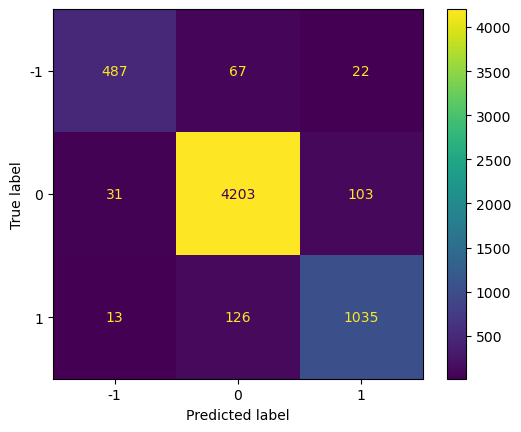

In [49]:
test_data['inference']=inference
labels = [-1, 0, 1]
cm = confusion_matrix(test_data["labels"], test_data["inference"], labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [50]:
print(classification_report(test_data["labels"], test_data["inference"]))

              precision    recall  f1-score   support

        -1.0       0.92      0.85      0.88       576
         0.0       0.96      0.97      0.96      4337
         1.0       0.89      0.88      0.89      1174

    accuracy                           0.94      6087
   macro avg       0.92      0.90      0.91      6087
weighted avg       0.94      0.94      0.94      6087



In [53]:
test_data['inference'].value_counts()

 0.0    4396
 1.0    1160
-1.0     531
Name: inference, dtype: int64

In [54]:
inference = []
skipped_index = []
# test_data = test_data.reset_index(drop=True)

i = 0
for item in data['vader_preprocessing_text']:
    sentence = Sentence(item)
    classifier.predict(sentence)
    if sentence.labels:
        inference += [float(sentence.labels[0].value)]
    else:
        data.drop(index=i, inplace=True)
        skipped_index.append(i)
    i += 1
    if i%500==0:
        print(i)
# except:
#   print(i,item)
#   print("error")
# test_data
print(skipped_index)
print(len(inference))
print(len(data["labels"]))

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
[5251, 7176, 7428, 10911, 14828, 16257, 17519, 18378, 18860, 26918

In [58]:
data = data.drop('final_class', axis=1)
data['final_class']=inference
data

,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,inference,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",...,0.000,1.000,0.000,0.0000,0,0.767857,0.142857,1,0.0,0.0
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0,0.0
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0,0.0
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",...,0.000,0.607,0.393,0.6351,1,0.300000,0.359375,1,1.0,1.0


In [59]:
data.to_csv("final_csv_for_indexing.csv", index=False)